## Week2_HomeWork
### 透過爬蟲爬下台灣各縣市稅收，與91APP 資料合併，觀察各縣市稅收與購買量是否有關聯
#### (利用這幾周所學完成作業，將每個步驟遇到的問題打出來)

## 1.載入資料

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Orders.csv',header = 0,sep = ",")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. 觀察資料

In [3]:
df.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

#### 使用  to_datetime() 把 DateId 轉成日期格式並存成新的變數 new_DateId

In [5]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
df.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03


## 3. 網路爬蟲

#### 爬下各縣市所得稅統計(https://paytax.nat.gov.tw/TAXRPT_N_City.aspx?TAXOPT=A&PAYMENT_TYPE345=)

##### 載入所需套件

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
res = requests.get("https://paytax.nat.gov.tw/TAXRPT_N_City.aspx?TAXOPT=A&PAYMENT_TYPE345=")

print(res.text)



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" lang="zh-Hant-TW">
<head>
    <title>繳稅成功資料縣市別統計表（國稅）</title>
    <link href="css/tax.css" rel="stylesheet" type="text/css" />
    <script type="text/javascript" src="js/CopyRight.js"></script>
</head>
<body>
    <form name="Form1" method="post" action="./TAXRPT_N_City.aspx?TAXOPT=A&amp;PAYMENT_TYPE345=" id="Form1" mehtod="post">
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="xHPccxETqSm+kwHSyQLe+ZK88NFrqxTsfDq1dIDb27TreRjfBvXOmvy/6cJFFFE4CD7qcABSGhwJl5/Dh7vYZY/tf3IzrBT3INt2QWWa6Zo8BjhAkI2h8caRyhlPCnhCmLtud3JPi+cDOMi+6AwM/tcTIw7P7aBTh/+E2Q/9hhvfQBoIT0lXk3+PD+n9HydF/+6qDuLQpfds3uynabEf15k1TXv1bbI6SwUbwfXT6SwCmLqmGkBPJ6z2uHBOhM+r+vjbft7IDINPXXIVbQDNTNPUik5xuUjr7NPVF7UO8YnVCwgjCuUHD0HW4A2x2Oz+3wM5hzByAdq9QClZFPH3xt4MWxY2zIvNcSJk2Lh7S1BUVGbnhcqrfWJjYnHdCA3WEecJ1mnSa/20S6e+XT0Mt8HOowtdYNdnU+gG528ex9uAI/h5vrsve

In [8]:
soup = BeautifulSoup(res.text, 'html.parser')

In [9]:
city = soup.select('div')
print(city[0].text)





國稅局縣市晶片金融卡活期帳戶信用卡

合計件數合計金額合計件數合計金額電話語音網際網路網路申報合計件數合計金額

臺北國稅局臺北市7,573360,140,5995,148541,408,6177,66926,361167,278201,30833,008,301,792

小計-----7,573360,140,5995,148541,408,6177,66926,361167,278201,30833,008,301,792

高雄國稅局高雄市6,042139,555,6332,90099,591,3343,10216,09291,481110,6756,133,612,759

小計-----6,042139,555,6332,90099,591,3343,10216,09291,481110,6756,133,612,759

北區國稅局宜蘭縣1,05318,314,3944738,322,8092731,93011,14413,347453,137,828

 花蓮縣62410,615,1602855,699,5011241,1287,7028,954300,757,014

 金門縣4126,952,0762475,448,1091758336,8917,899287,296,041

 桃園市6,464153,415,3153,618195,031,4313,02313,87686,798103,6974,853,575,921

 基隆市93115,526,20146313,536,5896133,07413,93417,621552,157,352

 連江縣46763,16432668,124148176686127,692,898

 新北市11,155290,923,1706,489277,182,2996,97031,820184,668223,45812,149,406,443

 新竹市1,575103,876,724926101,396,2267733,56727,14331,4834,388,847,129

 新竹縣2,039110,509,2921,11199,711,4496363,24728,61532,4983,379,258,251

小計-----24,299710,895,49613,644706,996,5

#### 格式非我們想要的，上網搜尋發現其實抓表格用pandas裡面的read_html比較方便

In [10]:
url = 'https://paytax.nat.gov.tw/TAXRPT_N_City.aspx?TAXOPT=A&PAYMENT_TYPE345='
table = pd.read_html(url, encoding = "utf-8")[2]

In [11]:
table

,0,1,2,3,4,5,6,7,8,9,10
0,國稅局,縣市,晶片金融卡,活期帳戶,信用卡,NaN,NaN,NaN,NaN,NaN,NaN
1,合計件數,合計金額,合計件數,合計金額,電話語音,網際網路,網路申報,合計件數,合計金額,NaN,NaN
2,臺北國稅局,臺北市,7573,360140599,5148,541408617,7669,26361,167278,201308.0,3.300830e+10
3,小計,-----,7573,360140599,5148,541408617,7669,26361,167278,201308.0,3.300830e+10
4,高雄國稅局,高雄市,6042,139555633,2900,99591334,3102,16092,91481,110675.0,6.133613e+09
5,小計,-----,6042,139555633,2900,99591334,3102,16092,91481,110675.0,6.133613e+09
6,北區國稅局,宜蘭縣,1053,18314394,473,8322809,273,1930,11144,13347.0,4.531378e+08
7,NaN,花蓮縣,624,10615160,285,5699501,124,1128,7702,8954.0,3.007570e+08
8,NaN,金門縣,412,6952076,247,5448109,175,833,6891,7899.0,2.872960e+08
9,NaN,桃園市,6464,153415315,3618,195031431,3023,13876,86798,103697.0,4.853576e+09


#### 整理表格留下我們要的欄位

In [12]:
citytax = table[[1, 10]]
citytax.columns = ["City","Tax"]
citytax = citytax.drop([0,1,3,5,15,21,28,29])
citytax

,City,Tax
2,臺北市,3.300830e+10
4,高雄市,6.133613e+09
6,宜蘭縣,4.531378e+08
7,花蓮縣,3.007570e+08
8,金門縣,2.872960e+08
9,桃園市,4.853576e+09
10,基隆市,5.521574e+08
11,連江縣,2.769290e+07
12,新北市,1.214941e+10
13,新竹市,4.388847e+09


## 3. 整理資料
#### 使用groupby將原來資料以城市合併，才能和爬下來的稅收結合

In [13]:
df.groupby(by='City')['Quantity'].sum()

City
1st         45
25          10
<fo         41
Aya          2
Cha          1
Daf          2
Hsi          3
Hy           6
Ins          2
Jia          3
Kao          5
Keb          3
Kot          2
Nan         28
New         32
No.          3
Quậ          6
Tai          8
Tao         18
Xin          5
Đại          1
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東市        431
台東縣      34786
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東市        776
屏東縣     125121
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599460
桃園縣         93
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

In [14]:
df[df['City']=="Đại"] 

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
1999684,20160420,2616440,b'\xd6\xf4\xd3Y\xbc\xd9UJ\xd0>hT\x10\x0c\xea^2...,Web,Mobile,SevenEleven,12984541,2071736,True,False,...,Đại,NaN,510.0,cửa hàng Shang Village,941 903,SevenEleven,Cancel,NaN,NaN,2016-04-20


#### 發現了舊制縣市問題與亂碼，參考老師sample code解決
#### (https://github.com/NTU-CSX-Project/107-1PythonSampleCode/blob/master/week_2/course_2/clean_cityUnite.ipynb)
#### (https://github.com/NTU-CSX-Project/107-1PythonSampleCode/blob/master/week_2/course_2/final.ipynb)

In [15]:
# 上網抓有別人寫過的功能，判断一个unicode是否是汉字
def is_chinese(uchar):         
    if '\u4e00' <= uchar<='\u9fff':
        return True
    else:
        return False

In [16]:
# 測試
print(is_chinese('New'))
print(is_chinese('我x'))

False
True


In [17]:
array_clean1 = np.array(df)

In [18]:
ls_city = list(df['City'])

In [19]:
type(ls_city)

list

In [20]:
drop_list = list() #找出需要清的index
for i in range(len(ls_city)):
    try:
        if not (is_chinese(ls_city[i])):
#             print(str(i)+':'+(ls_city[i])+' will be dropped')
            drop_list.append(i)
            
    except:
#         print('error at '+ str(df['City'][i])+', i = '+str(i))
        drop_list.append(i)
        continue

In [21]:
array_clean1 = np.delete(array_clean1, drop_list, 0) #清掉
df_clean1 = pd.DataFrame(array_clean1, columns = list(df)) #list(df) can get header of df
df_clean1.groupby(by='City')['Quantity'].sum()

City
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東市        431
台東縣      34786
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東市        776
屏東縣     125121
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599460
桃園縣         93
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

#### 亂碼解決，接下來處理新舊制

In [22]:
for i, city in enumerate(df_clean1['City']):
    if city =='桃園縣':
        df_clean1.set_value(i, 'City', '桃園市')
        
    elif city == '台北縣':        
        df_clean1.set_value(i, 'City', '新北市')
        
    elif city == '台東市':
        df_clean1.set_value(i, 'City', '台東縣')
            
    elif city == '屏東市':        
        df_clean1.set_value(i, 'City', '屏東縣')
        
    elif city == '台南縣':        
        df_clean1.set_value(i, 'City', '台南市')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df_clean1.groupby(by='City')['Quantity'].sum()

City
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東縣      35217
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東縣     125897
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599553
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

In [24]:
df_city = df_clean1.groupby(by='City')['Quantity'].sum()

In [25]:
df_city = pd.DataFrame(df_city)
df_city

,Quantity
City,
南投縣,74939
台中市,815918
台北市,705464
台南市,407470
台東縣,35217
嘉義市,55276
嘉義縣,68262
基隆市,89367
宜蘭縣,87111


## 4. 合併檔案
#### 合併多個Dataframe有merge、concat等方法，這邊使用merge

In [26]:
# citytax 
# df_city
pd.merge(df_city,citytax,how='left',on='City')

,City,Quantity,Tax
0,南投縣,74939,4.837980e+08
1,台中市,815918,NaN
2,台北市,705464,NaN
3,台南市,407470,NaN
4,台東縣,35217,NaN
5,嘉義市,55276,5.021504e+08
6,嘉義縣,68262,3.366627e+08
7,基隆市,89367,5.521574e+08
8,宜蘭縣,87111,4.531378e+08
9,屏東縣,125897,5.622603e+08


#### 發現問題
#### 一份檔案是台、一份是臺

In [27]:
try_citytax = citytax

In [28]:
for i in range (2,27):
    try:
        try_citytax["City"][i] = try_citytax["City"][i].replace("臺", "台")
    except:
        continue

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
try_citytax

,City,Tax
2,台北市,3.300830e+10
4,高雄市,6.133613e+09
6,宜蘭縣,4.531378e+08
7,花蓮縣,3.007570e+08
8,金門縣,2.872960e+08
9,桃園市,4.853576e+09
10,基隆市,5.521574e+08
11,連江縣,2.769290e+07
12,新北市,1.214941e+10
13,新竹市,4.388847e+09


In [30]:
citytax = try_citytax
df_new = pd.merge(df_city,citytax,how='left',on='City')
df_new

,City,Quantity,Tax
0,南投縣,74939,4.837980e+08
1,台中市,815918,8.293675e+09
2,台北市,705464,3.300830e+10
3,台南市,407470,4.625326e+09
4,台東縣,35217,1.899764e+08
5,嘉義市,55276,5.021504e+08
6,嘉義縣,68262,3.366627e+08
7,基隆市,89367,5.521574e+08
8,宜蘭縣,87111,4.531378e+08
9,屏東縣,125897,5.622603e+08


## 5. 畫圖
#### python畫圖有matplotlib、plotly、seaborn等等，這裡使用matplotlib

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
## 加上這一行才能直接在jupyter裡出現圖

#### 使用散佈圖表示Quantity與Tax關係 
#### (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

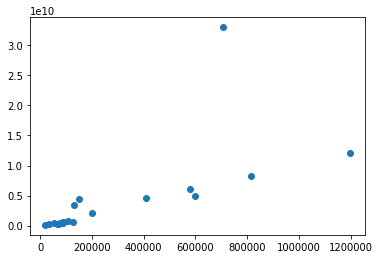

In [32]:
plt.scatter(df_new["Quantity"], df_new["Tax"])

#### 上圖可以看出大致關係
#### 再加工一下圖

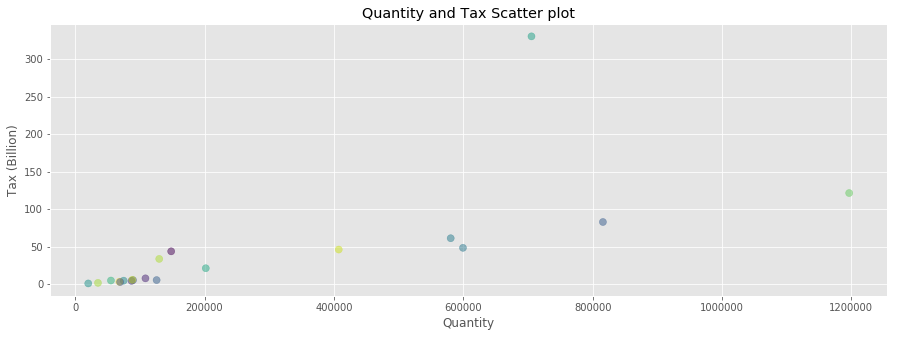

In [33]:
plt.style.use('ggplot')
x = df_new["Quantity"]
y = df_new["Tax"]/100000000

plt.figure(figsize=(15,5))
plt.title("Quantity and Tax Scatter plot")
plt.xlabel("Quantity")
plt.ylabel("Tax (Billion)")
plt.scatter(x, y, s=50, alpha=0.5,c=np.random.rand(20))

In [34]:
df_new[df_new["Tax"] == df_new["Tax"].max()]

,City,Quantity,Tax
2,台北市,705464,3.300830e+10


### 可以看出稅收越高大致上購物量也較大，蠻合理的因為人越多稅收也越多，會買東西的人也可以能多
### 除了台北市特別異常，稅收最高，購物量卻不是最多